Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [28]:
from itertools import combinations
from collections import namedtuple, defaultdict
from random import choice
from copy import deepcopy

from tqdm.auto import tqdm
import numpy as np
import logging
from matplotlib import pyplot as plt


In [29]:
EXP_RATE = 0.3
NUM_ROUNDS = 1_000
NUM_MATCHES = 100

In [30]:
State = namedtuple('State', ['x', 'o'])

In [31]:
MAGIC = [2, 7, 6, 9, 5, 1, 4, 3, 8]

In [32]:
def print_board(pos):
    """Nicely prints the board"""
    for r in range(3):
        for c in range(3):
            i = r * 3 + c
            if MAGIC[i] in pos.x:
                print('X', end='')
            elif MAGIC[i] in pos.o:
                print('O', end='')
            else:
                print('.', end='')
        print()
    print()

In [33]:
def win(elements):
    """Checks is elements is winning"""
    return any(sum(c) == 15 for c in combinations(elements, 3))

def state_value(pos: State):
    """Evaluate state: +1 first player wins"""
    if win(pos.x):
        return 1
    elif win(pos.o):
        return -1
    else:
        return 0
    
    

In [42]:
def random_game(turn):
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    while available:
        if turn == 0:
            x = choice(list(available))
            state.x.add(x)
            trajectory.append(deepcopy(state))
            available.remove(x)
            if win(state.x) or not available:
                break
            turn = 1
        else:
            o = choice(list(available))
            state.o.add(o)
            trajectory.append(deepcopy(state))
            available.remove(o)
            if win(state.o):
                break
            turn = 0
    return trajectory

In [43]:
value_dictionary = defaultdict(float)
hit_state = defaultdict(int)
epsilon = 0.001

for steps in tqdm(range(500_000)):
    turn = choice([0,1])
    trajectory = random_game(turn)
    final_reward = state_value(trajectory[-1])
    for state in trajectory:
        hashable_state = (frozenset(state.x), frozenset(state.o))
        hit_state[hashable_state] += 1
        value_dictionary[hashable_state] = value_dictionary[
            hashable_state
        ] + epsilon * (final_reward - value_dictionary[hashable_state])

  0%|          | 0/500000 [00:00<?, ?it/s]

In [44]:
sorted(value_dictionary.items(), key=lambda e: e[1], reverse=True)[:10]

[((frozenset({1, 2, 3, 4, 8}), frozenset({5, 6, 7, 9})), 0.7142466970936356),
 ((frozenset({4, 5, 6, 7, 8}), frozenset({1, 2, 3, 9})), 0.7128136342581558),
 ((frozenset({3, 4, 6, 8, 9}), frozenset({1, 2, 5, 7})), 0.7093448924036214),
 ((frozenset({2, 4, 7, 8, 9}), frozenset({1, 3, 5, 6})), 0.7081793595988687),
 ((frozenset({1, 4, 5, 7, 9}), frozenset({2, 3, 6, 8})), 0.7075948416874017),
 ((frozenset({1, 2, 3, 5, 8}), frozenset({4, 6, 7, 9})), 0.7067158688530703),
 ((frozenset({2, 3, 4, 6, 9}), frozenset({1, 5, 7, 8})), 0.7043590022840612),
 ((frozenset({1, 2, 3, 6, 8}), frozenset({4, 5, 7, 9})), 0.7034703024840763),
 ((frozenset({1, 5, 7, 8, 9}), frozenset({2, 3, 4, 6})), 0.7034703024840763),
 ((frozenset({2, 3, 6, 7, 9}), frozenset({1, 4, 5, 8})), 0.7025789312435923)]

In [45]:
len(hit_state)

8532

In [46]:
def chooseAction(available_positions, actual_state, value_dictionary):
        if np.random.uniform(0, 1) <= EXP_RATE:
            # take random action
            action = choice(list(available_positions))   
        else:
            value_max = -999
            for p in available_positions:
                # next_board = current_board.copy()
                # next_board[p] = symbol
                next_state = deepcopy(actual_state)
                next_state.x.add(p)
                hashable_state = (frozenset(next_state.x), frozenset(next_state.o))
                
                value = 0 if value_dictionary.get(hashable_state) is None else value_dictionary.get(hashable_state)
                # print("value", value)
                if value >= value_max:
                    value_max = value
                    action = p
        # print("{} takes action {}".format(self.name, action))
        return action

In [47]:
def play(value_dictionary, turn) :
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    while available:
        if turn == 0:
            x = chooseAction(available, state, value_dictionary)
            state.x.add(x)
            trajectory.append(deepcopy(state))
            available.remove(x)
            if win(state.x) or not available:
                break
            turn = 1
        else:
            o = choice(list(available))
            state.o.add(o)
            trajectory.append(deepcopy(state))
            available.remove(o)
            if win(state.o):
                break
            turn = 0
    return trajectory
    
    # print_board(state)


73 %
Win:73
Stall:18
Lose:9
Not lose %: 91.0 %


79 %
Win:79
Stall:10
Lose:11
Not lose %: 89.0 %


77 %
Win:77
Stall:13
Lose:10
Not lose %: 90.0 %


78 %
Win:78
Stall:13
Lose:9
Not lose %: 91.0 %

64 %
Win:64
Stall:19
Lose:17
Not lose %: 83.0 %


77 %
Win:77
Stall:14
Lose:9
Not lose %: 91.0 %


79 %
Win:79
Stall:11
Lose:10
Not lose %: 90.0 %


75 %
Win:75
Stall:18
Lose:7
Not lose %: 93.0 %

74 %
Win:74
Stall:17
Lose:9
Not lose %: 91.0 %


70 %
Win:70
Stall:20
Lose:10
Not lose %: 90.0 %


76 %
Win:76
Stall:16
Lose:8
Not lose %: 92.0 %


75 %
Win:75
Stall:18
Lose:7
Not lose %: 93.0 %


78 %
Win:78
Stall:14
Lose:8
Not lose %: 92.0 %

78 %
Win:78
Stall:16
Lose:6
Not lose %: 94.0 %


76 %
Win:76
Stall:19
Lose:5
Not lose %: 95.0 %


75 %
Win:75
Stall:20
Lose:5
Not lose %: 95.0 %


74 %
Win:74
Stall:11
Lose:15
Not lose %: 85.0 %


74 %
Win:74
Stall:19
Lose:7
Not lose %: 93.0 %

72 %
Win:72
Stall:16
Lose:12
Not lose %: 88.0 %


78 %
Win:78
Stall:12
Lose:10
Not lose %: 90.0 %


81 %
Win:81
Stal

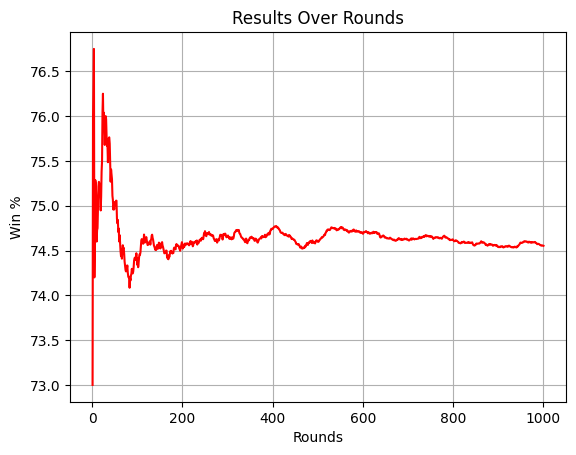

In [49]:
logging.getLogger().setLevel(logging.INFO)

history = []
for round in range(NUM_ROUNDS):
    result = [0, 0, 0]          # --> [WINNING, STALL, LOSING]
    n_win=0
    for match in range(NUM_MATCHES):
        turn = choice([0,1])
        winner = state_value(play(value_dictionary, turn)[-1])
        
        if winner==1:
            result[0] += 1
            n_win += 1
        elif winner==0:
            result[1] += 1
        elif winner==-1:
            result[2] += 1
    
    history.append(n_win)
    print(f"{n_win} %")
    print(f"Win:{result[0]}\nStall:{result[1]}\nLose:{result[2]}\nNot lose %: {(result[0]+result[1])/(result[0]+result[1]+result[2])*100} %\n\n")

history = np.array(history)
avg_at_every_round = np.cumsum(history) / (np.arange(len(history)) + 1)
generations = range(1, 1000 + 1)

plt.plot(generations, avg_at_every_round, linestyle='-', color='r')
plt.title('Results Over Rounds')
plt.xlabel('Rounds')
plt.ylabel('Win %')
plt.grid(True)
plt.show()